In [3]:
!python --version

Python 3.8.10


In [ ]:
# proce calculate of banguluro house

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

In [64]:
df = pd.read_csv('C:\\Users\\HP\\AKASH KRISHNA SHIRKE\\ML modules\\Bengaluru_House_Data.csv')
df.head(5)
# target feature is 'price'

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


Step 1: Feature Engineering

# Step 1: Feature Engineering

In [65]:
# remove null values

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [67]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [68]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [69]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [70]:
# totale rows = 13320 and in society column 5502 null values

# null value treatment

df['society'].value_counts()

In [56]:
# for df['society'] columns:

b = df['society'].unique()

In [24]:
b.shape  # 2689 values are unique

(2689,)

In [71]:
df['society'].value_counts()

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: society, Length: 2688, dtype: int64

In [72]:
# so we use mode method for null vbalue tritment

In [73]:
df['society'] = df['society'].fillna(df['society'].mode()[0])

In [74]:
df.isnull().sum()

area_type         0
availability      0
location          1
size             16
society           0
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [75]:
df['society'].value_counts()

GrrvaGr    5582
PrarePa      76
Sryalan      59
Prtates      59
GMown E      56
           ... 
Amionce       1
JaghtDe       1
Jauraht       1
Brity U       1
RSntsAp       1
Name: society, Length: 2688, dtype: int64

In [ ]:
# for balcony columns:

In [60]:
df['balcony'].unique()

array([ 1.,  3., nan,  2.,  0.])

In [61]:
df['balcony'].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [76]:
df['balcony'] = df['balcony'].fillna(0)

In [77]:
df.isnull().sum()

area_type        0
availability     0
location         1
size            16
society          0
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [78]:
df.dropna(inplace = True)

In [79]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [80]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200,2.0,1.0,51.00


In [83]:
# 'size' columns only take integer values

df['size'] = df['size'].map(lambda x:x.split(" ")[0])

#find outliers

In [85]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [90]:
from sklearn.preprocessing import OrdinalEncoder

df['New_area_type'] = OrdinalEncoder().fit_transform(df['area_type'].values.reshape(-1,1))

In [91]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,New_area_type
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056,2.0,1.0,39.07,3.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600,5.0,3.0,120.00,2.0
2,Built-up Area,Ready To Move,Uttarahalli,3,GrrvaGr,1440,2.0,3.0,62.00,0.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521,3.0,1.0,95.00,3.0
4,Super built-up Area,Ready To Move,Kothanur,2,GrrvaGr,1200,2.0,1.0,51.00,3.0
...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5,ArsiaEx,3453,4.0,0.0,231.00,0.0
13316,Super built-up Area,Ready To Move,Richards Town,4,GrrvaGr,3600,5.0,0.0,400.00,3.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2,Mahla T,1141,2.0,1.0,60.00,0.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4,SollyCl,4689,4.0,1.0,488.00,3.0


In [105]:
a = df['availability'].unique()

In [103]:
a.shape

(80,)

In [97]:
b = df['area_type'].unique()

In [99]:
b.shape

(4,)

In [109]:
df = df.drop(['area_type','availability','location','society'],axis = 1)

In [111]:
df.head(5)

,size,total_sqft,bath,balcony,price,New_area_type
0,2,1056,2.0,1.0,39.07,3.0
1,4,2600,5.0,3.0,120.00,2.0
2,3,1440,2.0,3.0,62.00,0.0
3,3,1521,3.0,1.0,95.00,3.0
4,2,1200,2.0,1.0,51.00,3.0


In [112]:
# check outliers

df.describe()

,bath,balcony,price,New_area_type
count,13246.000000,13246.000000,13246.000000,13246.00000
mean,2.692586,1.520233,112.389392,2.28937
std,1.341506,0.859301,149.076587,1.14478
min,1.000000,0.000000,8.000000,0.00000
25%,2.000000,1.000000,50.000000,2.00000
50%,2.000000,2.000000,72.000000,3.00000
75%,3.000000,2.000000,120.000000,3.00000
max,40.000000,3.000000,3600.000000,3.00000


In [120]:
df.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_7556\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,bath,balcony,price,New_area_type
bath,1.000000,0.071022,0.456350,-0.101652
balcony,0.071022,1.000000,0.021980,0.101000
price,0.456350,0.021980,1.000000,-0.057561
New_area_type,-0.101652,0.101000,-0.057561,1.000000


<AxesSubplot: ylabel='bath'>

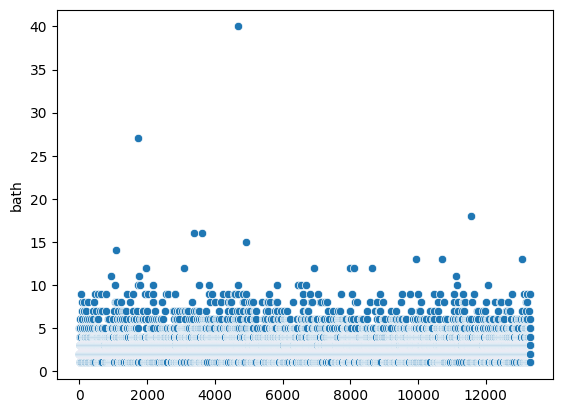

In [114]:
sns.scatterplot(df['bath'])

In [117]:
from matplotlib import pyplot as plt

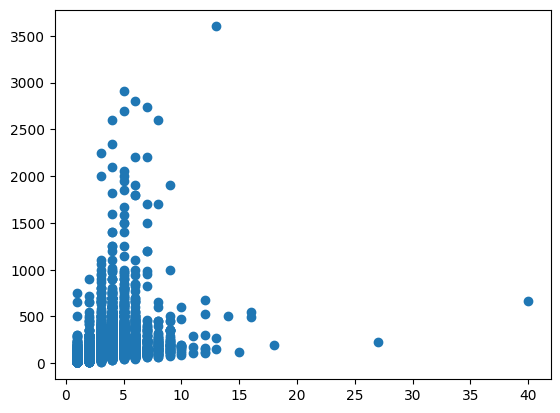

In [119]:
plt.scatter(df['bath'],df['price'])

<AxesSubplot: >

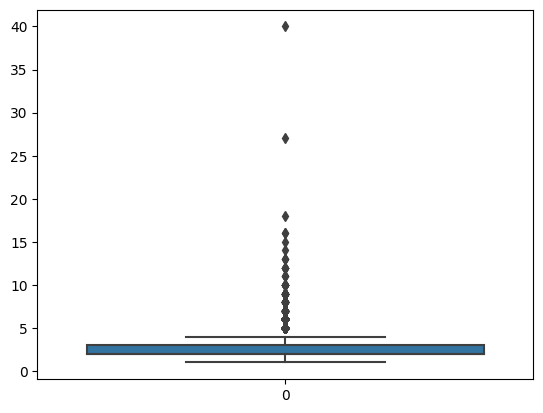

In [122]:
sns.boxplot(df['bath'])

In [123]:
# use Z squre method for delete outliers

In [124]:
df['Zbath'] = (df.bath - df.bath.mean())/df.bath.std()

In [127]:
df.head(5)

,size,total_sqft,bath,balcony,price,New_area_type,Zbath
0,2,1056,2.0,1.0,39.07,3.0,-0.516275
1,4,2600,5.0,3.0,120.00,2.0,1.720017
2,3,1440,2.0,3.0,62.00,0.0,-0.516275
3,3,1521,3.0,1.0,95.00,3.0,0.229156
4,2,1200,2.0,1.0,51.00,3.0,-0.516275


<AxesSubplot: >

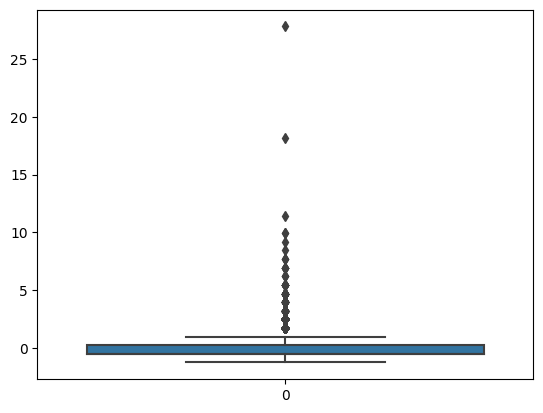

In [128]:
sns.boxplot(df['Zbath'])      # we check sns.boxplot(df['bath'])   and  sns.boxplot(df['Zbath']) yanche boxplot same aahet ka

In [129]:
df[(df['Zbath']>3)| (df['Zbath']<-3)]    # this table is outliers table

,size,total_sqft,bath,balcony,price,New_area_type,Zbath
45,8,600,9.0,0.0,200.0,2.0,4.701741
64,8,3000,8.0,0.0,140.0,0.0,3.956310
68,8,1350,7.0,0.0,85.0,2.0,3.210879
85,6,3000,7.0,2.0,210.0,0.0,3.210879
129,7,950,7.0,0.0,115.0,2.0,3.210879
...,...,...,...,...,...,...,...
13219,7,1590,9.0,3.0,132.0,2.0,4.701741
13221,9,1178,9.0,1.0,75.0,2.0,4.701741
13226,8,6000,8.0,3.0,215.0,0.0,3.956310
13277,7,1400,7.0,0.0,218.0,2.0,3.210879


In [130]:
df[~(df['Zbath']>3)| (df['Zbath']<-3)]     # this table is without outliers table

,size,total_sqft,bath,balcony,price,New_area_type,Zbath
0,2,1056,2.0,1.0,39.07,3.0,-0.516275
1,4,2600,5.0,3.0,120.00,2.0,1.720017
2,3,1440,2.0,3.0,62.00,0.0,-0.516275
3,3,1521,3.0,1.0,95.00,3.0,0.229156
4,2,1200,2.0,1.0,51.00,3.0,-0.516275
...,...,...,...,...,...,...,...
13315,5,3453,4.0,0.0,231.00,0.0,0.974586
13316,4,3600,5.0,0.0,400.00,3.0,1.720017
13317,2,1141,2.0,1.0,60.00,0.0,-0.516275
13318,4,4689,4.0,1.0,488.00,3.0,0.974586


In [132]:
df3 = df[~(df['Zbath']>3)| (df['Zbath']<-3)]  # new data frame create without outliers in zbath columns

In [133]:
df3   

,size,total_sqft,bath,balcony,price,New_area_type,Zbath
0,2,1056,2.0,1.0,39.07,3.0,-0.516275
1,4,2600,5.0,3.0,120.00,2.0,1.720017
2,3,1440,2.0,3.0,62.00,0.0,-0.516275
3,3,1521,3.0,1.0,95.00,3.0,0.229156
4,2,1200,2.0,1.0,51.00,3.0,-0.516275
...,...,...,...,...,...,...,...
13315,5,3453,4.0,0.0,231.00,0.0,0.974586
13316,4,3600,5.0,0.0,400.00,3.0,1.720017
13317,2,1141,2.0,1.0,60.00,0.0,-0.516275
13318,4,4689,4.0,1.0,488.00,3.0,0.974586


<AxesSubplot: >

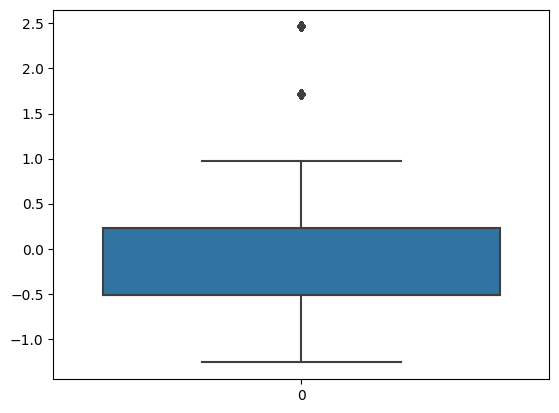

In [136]:
sns.boxplot(df3['Zbath']) 

<AxesSubplot: >

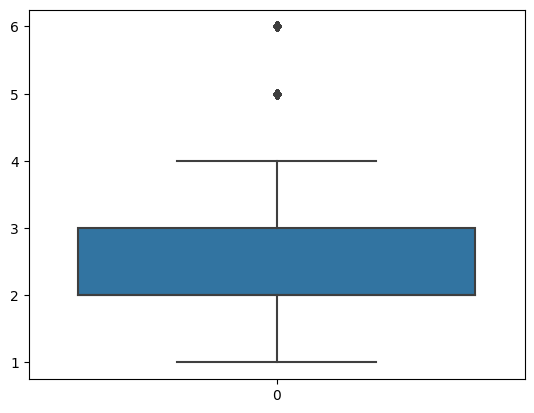

In [139]:
sns.boxplot(df3['bath']) 

In [138]:
df3.describe()

,bath,balcony,price,New_area_type,Zbath
count,13004.000000,13004.000000,13004.00000,13004.000000,13004.000000
mean,2.585435,1.525069,108.93455,2.299446,-0.079874
std,1.022852,0.848830,136.93012,1.145829,0.762465
min,1.000000,0.000000,8.00000,0.000000,-1.261706
25%,2.000000,1.000000,49.87750,2.000000,-0.516275
50%,2.000000,2.000000,70.00000,3.000000,-0.516275
75%,3.000000,2.000000,116.00000,3.000000,0.229156
max,6.000000,3.000000,2912.00000,3.000000,2.465448


<AxesSubplot: >

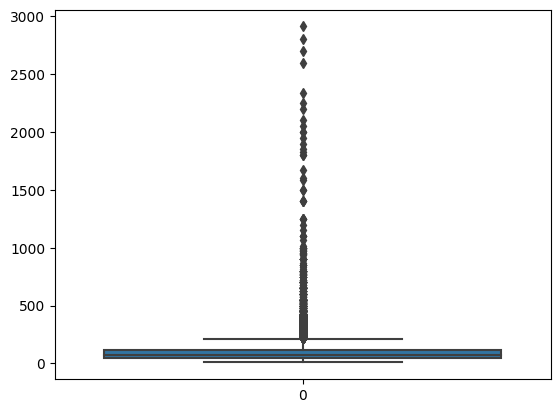

In [140]:
sns.boxplot(df3['price']) 

In [141]:
# check outliers in 'price'

df3['Zprice'] = (df3.price - df3.price.mean())/df3.price.std()

C:\Users\HP\AppData\Local\Temp\ipykernel_7556\2975730364.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Zprice'] = (df3.price - df3.price.mean())/df3.price.std()


In [142]:
df3[(df3['Zprice']>3)| (df3['Zprice']<-3)]    # this table is outliers table

,size,total_sqft,bath,balcony,price,New_area_type,Zbath,Zprice
7,4,3300,4.0,0.0,600.0,3.0,0.974586,3.586249
62,4,5700,5.0,3.0,650.0,2.0,1.720017,3.951398
159,4,3750,4.0,0.0,760.0,2.0,0.974586,4.754728
408,7,12000,6.0,3.0,2200.0,3.0,2.465448,15.271041
440,4,11890,4.0,3.0,700.0,2.0,0.974586,4.316548
...,...,...,...,...,...,...,...,...
13095,4,6652,6.0,1.0,660.0,3.0,2.465448,4.024428
13104,4,2920,4.0,3.0,536.0,0.0,0.974586,3.118857
13119,4,6688,6.0,1.0,700.0,2.0,2.465448,4.316548
13197,4,9200,4.0,0.0,2600.0,2.0,0.974586,18.192239


In [144]:
df3[~(df3['Zprice']>3)| (df3['Zprice']<-3)]    # this table is without outliers table

,size,total_sqft,bath,balcony,price,New_area_type,Zbath,Zprice
0,2,1056,2.0,1.0,39.07,3.0,-0.516275,-0.510220
1,4,2600,5.0,3.0,120.00,2.0,1.720017,0.080811
2,3,1440,2.0,3.0,62.00,0.0,-0.516275,-0.342763
3,3,1521,3.0,1.0,95.00,3.0,0.229156,-0.101764
4,2,1200,2.0,1.0,51.00,3.0,-0.516275,-0.423096
...,...,...,...,...,...,...,...,...
13315,5,3453,4.0,0.0,231.00,0.0,0.974586,0.891443
13316,4,3600,5.0,0.0,400.00,3.0,1.720017,2.125650
13317,2,1141,2.0,1.0,60.00,0.0,-0.516275,-0.357369
13318,4,4689,4.0,1.0,488.00,3.0,0.974586,2.768313


In [208]:
df4 = df3[~(df3['Zprice']>3)| (df3['Zprice']<-3)] 

In [209]:
df4.head(5)

,size,total_sqft,bath,balcony,price,New_area_type,Zbath,Zprice
0,2,1056,2.0,1.0,39.07,3.0,-0.516275,-0.510220
1,4,2600,5.0,3.0,120.00,2.0,1.720017,0.080811
2,3,1440,2.0,3.0,62.00,0.0,-0.516275,-0.342763
3,3,1521,3.0,1.0,95.00,3.0,0.229156,-0.101764
4,2,1200,2.0,1.0,51.00,3.0,-0.516275,-0.423096


<AxesSubplot: >

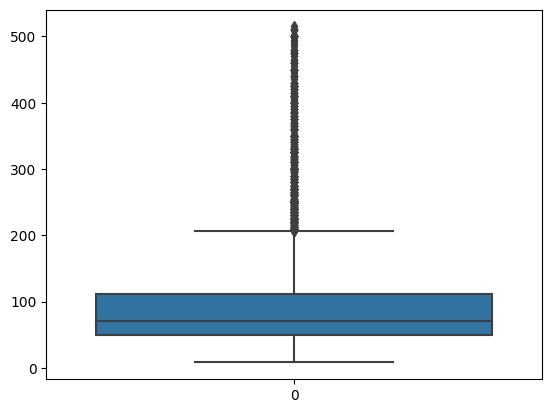

In [210]:
sns.boxplot(df4['price']) 

<AxesSubplot: >

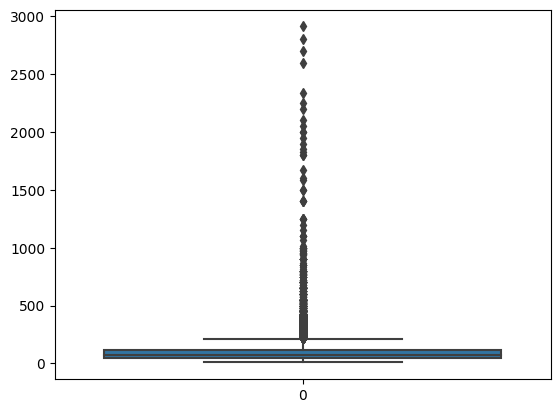

In [211]:
sns.boxplot(df3['price']) 

In [212]:
df4.head(5)

,size,total_sqft,bath,balcony,price,New_area_type,Zbath,Zprice
0,2,1056,2.0,1.0,39.07,3.0,-0.516275,-0.510220
1,4,2600,5.0,3.0,120.00,2.0,1.720017,0.080811
2,3,1440,2.0,3.0,62.00,0.0,-0.516275,-0.342763
3,3,1521,3.0,1.0,95.00,3.0,0.229156,-0.101764
4,2,1200,2.0,1.0,51.00,3.0,-0.516275,-0.423096


In [213]:
df4 = df4.drop(['Zbath','Zprice'],axis = 1)

In [214]:
df4.head(5)

,size,total_sqft,bath,balcony,price,New_area_type
0,2,1056,2.0,1.0,39.07,3.0
1,4,2600,5.0,3.0,120.00,2.0
2,3,1440,2.0,3.0,62.00,0.0
3,3,1521,3.0,1.0,95.00,3.0
4,2,1200,2.0,1.0,51.00,3.0


In [215]:
x = df4.drop('price',axis = 1)

In [216]:
y = df4['price']

In [217]:
from sklearn.model_selection import train_test_split

In [218]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [168]:
x_train.shape

(8955, 5)

In [169]:
x_test.shape

(3839, 5)

In [170]:
y_test.shape

(3839,)

In [171]:
y_train.shape

(8955,)

In [219]:
x_train.shape,x_test.shape, y_train.shape,y_test.shape

((8955, 5), (3839, 5), (8955,), (3839,))

In [197]:
y_train.unique()

array([151.  ,  39.73,  55.  , ...,  80.91,  93.04,  86.56])

In [202]:
#y_train = y_train.values.reshape(-1,1)

In [203]:
#y_train.shape

(8955, 1)

In [172]:
from sklearn.linear_model import LinearRegression

In [222]:
lin_model = LinearRegression()
#lin_model.fit(x_train,y_train)

In [223]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8955 entries, 6913 to 4835
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   size           8955 non-null   object 
 1   total_sqft     8955 non-null   object 
 2   bath           8955 non-null   float64
 3   balcony        8955 non-null   float64
 4   New_area_type  8955 non-null   float64
dtypes: float64(3), object(2)
memory usage: 419.8+ KB


In [226]:
x_train['size'] = x_train['size'].astype(float)

In [227]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8955 entries, 6913 to 4835
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   size           8955 non-null   float64
 1   total_sqft     8955 non-null   object 
 2   bath           8955 non-null   float64
 3   balcony        8955 non-null   float64
 4   New_area_type  8955 non-null   float64
dtypes: float64(4), object(1)
memory usage: 419.8+ KB


In [229]:
#x_train['total_sqft'] = x_train['total_sqft'].astype(float)  # he error dete because following value present in column
                                                              #[1005.03 - 1252.49, 697Sq. Meter, 645 - 936, 30Acres ]

# Remove string data in     "x_train['total_sqft']"

In [270]:
k = []
for i in x_train['total_sqft']:   # ya column madhe [1005.03 - 1252.49, 697Sq. Meter, 645 - 936, 30Acres ] asha values aahet
    if i.isnumeric():
        k.append(i)

In [267]:
len(k)

8768

In [271]:
w = []
for i in x_train['total_sqft']:  
    w.append(i)

In [272]:
len(w)

8955

In [273]:
E = []
for i in w:
    if i not in k:
        E.append(i)

In [276]:
len(E)

187

In [277]:
8768-8955

-187

In [282]:
a = []
for i in range(len(E)):
    a.append(1056)

In [286]:
x_train['total_sqft'] = x_train['total_sqft'].replace(E,a)

In [289]:
x_train['total_sqft'] = x_train['total_sqft'].astype(float)

In [290]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8955 entries, 6913 to 4835
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   size           8955 non-null   float64
 1   total_sqft     8955 non-null   float64
 2   bath           8955 non-null   float64
 3   balcony        8955 non-null   float64
 4   New_area_type  8955 non-null   float64
dtypes: float64(5)
memory usage: 419.8 KB


# Remove string data in "x_test['total_sqft']""

In [301]:
x_test['size'] = x_test['size'].astype(float)

In [304]:
k1 = []
for i in x_test['total_sqft']:   # ya column madhe [1005.03 - 1252.49, 697Sq. Meter, 645 - 936, 30Acres ] asha values aahet
    if i.isnumeric():
        k1.append(i)

In [306]:
len(k1)

3757

In [309]:
w1 = []
for i in x_test['total_sqft']:  
    w1.append(i)

In [310]:
len(w1)

3839

In [311]:
3839 - 3757

82

In [312]:
E1 = []
for i in w1:
    if i not in k1:
        E1.append(i)

In [314]:
len(E1)

82

In [320]:
a1 = []
for i in range(len(E1)):
    a1.append(1056)

In [321]:
len(a1)

82

In [322]:
x_test['total_sqft'] = x_test['total_sqft'].replace(E1,a1)

In [323]:
x_test['total_sqft'] = x_test['total_sqft'].astype(float)

In [324]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3839 entries, 7389 to 2346
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   size           3839 non-null   float64
 1   total_sqft     3839 non-null   float64
 2   bath           3839 non-null   float64
 3   balcony        3839 non-null   float64
 4   New_area_type  3839 non-null   float64
dtypes: float64(5)
memory usage: 180.0 KB


In [291]:
lin_model = LinearRegression()
lin_model.fit(x_train,y_train)    

LinearRegression()

In [325]:
x_train.head(5)

,size,total_sqft,bath,balcony,New_area_type
6913,2.0,1130.0,2.0,1.0,3.0
3411,3.0,1530.0,2.0,2.0,3.0
12685,4.0,3100.0,5.0,0.0,0.0
2427,3.0,1635.0,2.0,2.0,3.0
3975,2.0,1200.0,3.0,1.0,2.0


In [326]:
x_test.head(5)

,size,total_sqft,bath,balcony,New_area_type
7389,2.0,1280.0,2.0,2.0,3.0
8920,2.0,1156.0,2.0,2.0,3.0
779,3.0,1975.0,3.0,3.0,3.0
7729,2.0,1000.0,2.0,0.0,3.0
4946,3.0,1530.0,2.0,2.0,3.0


# testing data #

In [332]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

y_pred = lin_model.predict(x_test)

mse = mean_squared_error(y_test,y_pred)  # mse(mean squre error) y_test means actual data and y_pred means predicted data
print(f"MSE = {mse}")
print(f"RMSE = {np.sqrt(mse)}")

mae = mean_absolute_error(y_test,y_pred)
print(f"MAE = {mae}")

r2 = r2_score(y_test,y_pred)
print(f"R-squre value = {r2}")

MSE = 3254.4705560347033
RMSE = 57.04796715076448
MAE = 34.49734723208722
R-squre value = 0.48102144757226484


# training data 

In [333]:


y_pred_train = lin_model.predict(x_train)

print("Training data metrx")

mse = mean_squared_error(y_train,y_pred_train) 
print(f"MSE = {mse}")
print(f"RMSE = {np.sqrt(mse)}")

mae = mean_absolute_error(y_train,y_pred_train)
print(f"MAE = {mae}")

r2 = r2_score(y_train,y_pred_train)
print(f"R-squre value = {r2}")

Training data metrx
MSE = 3161.3611273243628
RMSE = 56.22598267104242
MAE = 33.98524747770655
R-squre value = 0.4833548849907905


# USER TEST fuction:

In [334]:
x_train.head(1).T

,6913
size,2.0
total_sqft,1130.0
bath,2.0
balcony,1.0
New_area_type,3.0


In [343]:
size = 4.0
total_sqft = 2600
bath = 5.0
balcony = 3.0
New_area_type = 2.0

array = np.array([size, total_sqft,bath, balcony, New_area_type],ndmin = 2)

print(array)
print(array.ndim) 

[[4.0e+00 2.6e+03 5.0e+00 3.0e+00 2.0e+00]]
2


In [344]:
PRICE = lin_model.predict(array)
print("PRICE :",PRICE)

PRICE : [213.24614537]


C:\Users\HP\anaconda3\envs\bhouse\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [340]:
df4.head(5)

,size,total_sqft,bath,balcony,price,New_area_type
0,2,1056,2.0,1.0,39.07,3.0
1,4,2600,5.0,3.0,120.00,2.0
2,3,1440,2.0,3.0,62.00,0.0
3,3,1521,3.0,1.0,95.00,3.0
4,2,1200,2.0,1.0,51.00,3.0


# Create pickel file

In [353]:
import pickle

with open("model.pickle","wb") as file:
    pickle.dump(lin_model,file)


In [351]:
# we resqured json file so create :

import json

columns_list = list(x.columns)
d1 = {'columns':columns_list}

In [352]:
with open("features.json",'w') as file:
    json.dump(d1, file)